# PREWORK

## Imports

In [1]:
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import requests

# FUCTIONS

In [94]:
def read_tabla(my_input, my_parametros):
    # Prepare url
    my_url = 'https://servicios.ine.es/wstempus/js/{}/{}/{}?{}'.format('ES', 'DATOS_TABLA', my_input, my_parametros)

    # Make request
    my_r = requests.get(my_url)

    # Loop over series
    my_table = []
    for my_r_series in my_r.json():
        # Prepare dafrom bs4 import BeautifulSouptaframe
        my_series = pd.DataFrame(my_r_series['Data'])\
            .loc[:, ['Fecha', 'Valor']]\
            .rename(columns={'Valor': my_r_series['Nombre']})
        
        # Clean date
        my_series['Fecha'] = pd.to_datetime(my_series['Fecha'])

        # Prepare series
        my_series = my_series.set_index('Fecha')

        # Save
        my_table.append(my_series)
    
    # Concat
    my_table = pd.concat(my_table, axis=1)

    return my_table

# POBLACION

## Por nacionalidad

In [154]:
my_table_56936 = read_tabla('56936', 'nult=100&tip=A')
my_series_56936_total = my_table_56936['Total Nacional. Total. Todas las edades. Total. Población. Número. ']
my_series_56936_extranjeros = my_table_56936['Total Nacional. Extranjero. Todas las edades. Total. Población. Número. ']

[]

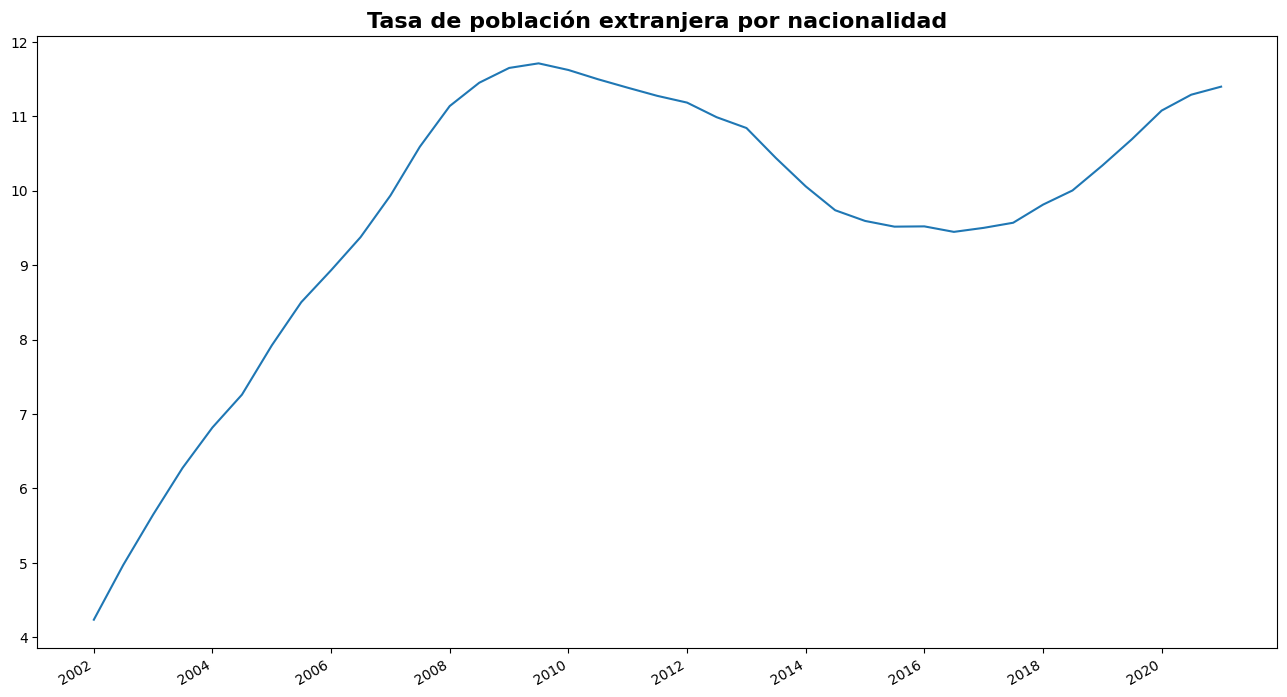

In [155]:
my_series_plot = 100 * (my_series_56936_extranjeros / my_series_56936_total)

fig, ax = plt.subplots(figsize=(16, 9))
my_series_plot.plot(ax=ax)
ax.set_title('Tasa de población extranjera por nacionalidad', fontsize=16, weight='bold')
ax.set_xlabel('')
ax.set_ylabel('')
plt.plot()

## Por país de origen

In [156]:
my_table_56937 = read_tabla('56937', 'nult=100&tip=A')
my_series_56937_total = my_table_56937['Total Nacional. Total. Todas las edades. Total. Población. Número. ']
my_series_56937_extranjeros = my_table_56937['Total Nacional. Extranjero. Todas las edades. Total. Población. Número. ']

[]

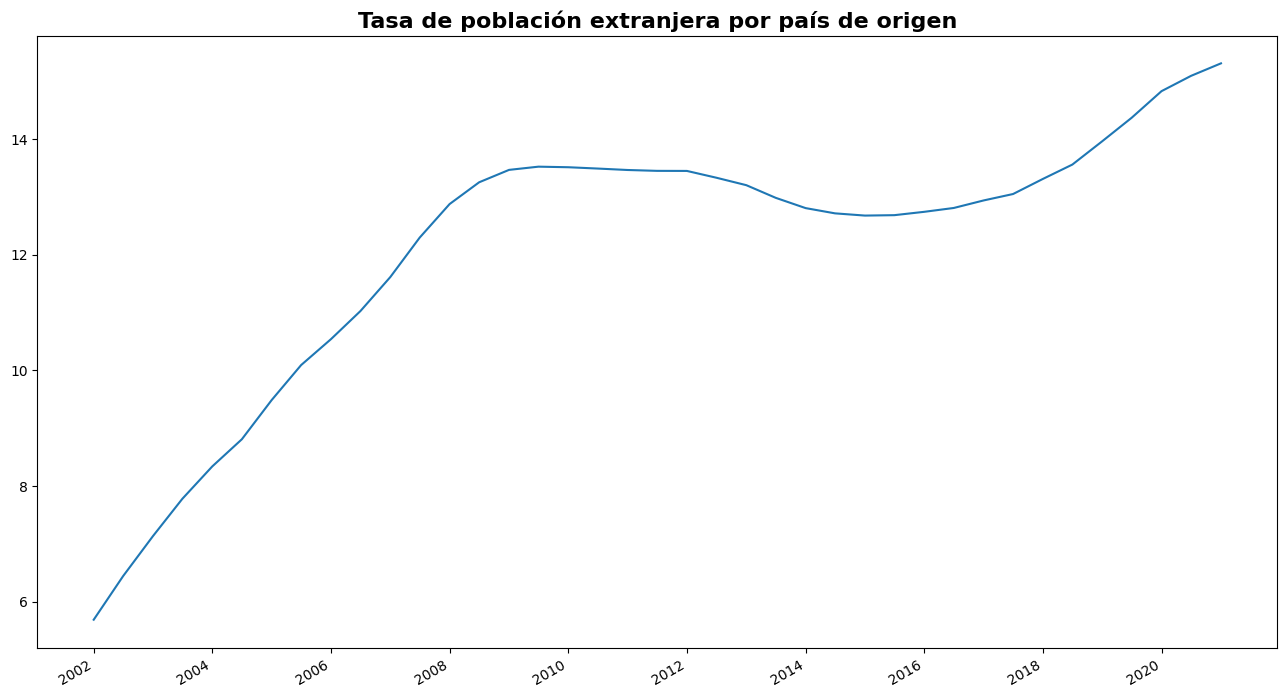

In [157]:
my_series_plot = 100 * (my_series_56937_extranjeros / my_series_56937_total)

fig, ax = plt.subplots(figsize=(16, 9))
my_series_plot.plot(ax=ax)
ax.set_title('Tasa de población extranjera por país de origen', fontsize=16, weight='bold')
ax.set_xlabel('')
ax.set_ylabel('')
plt.plot()

## Comparativa

[]

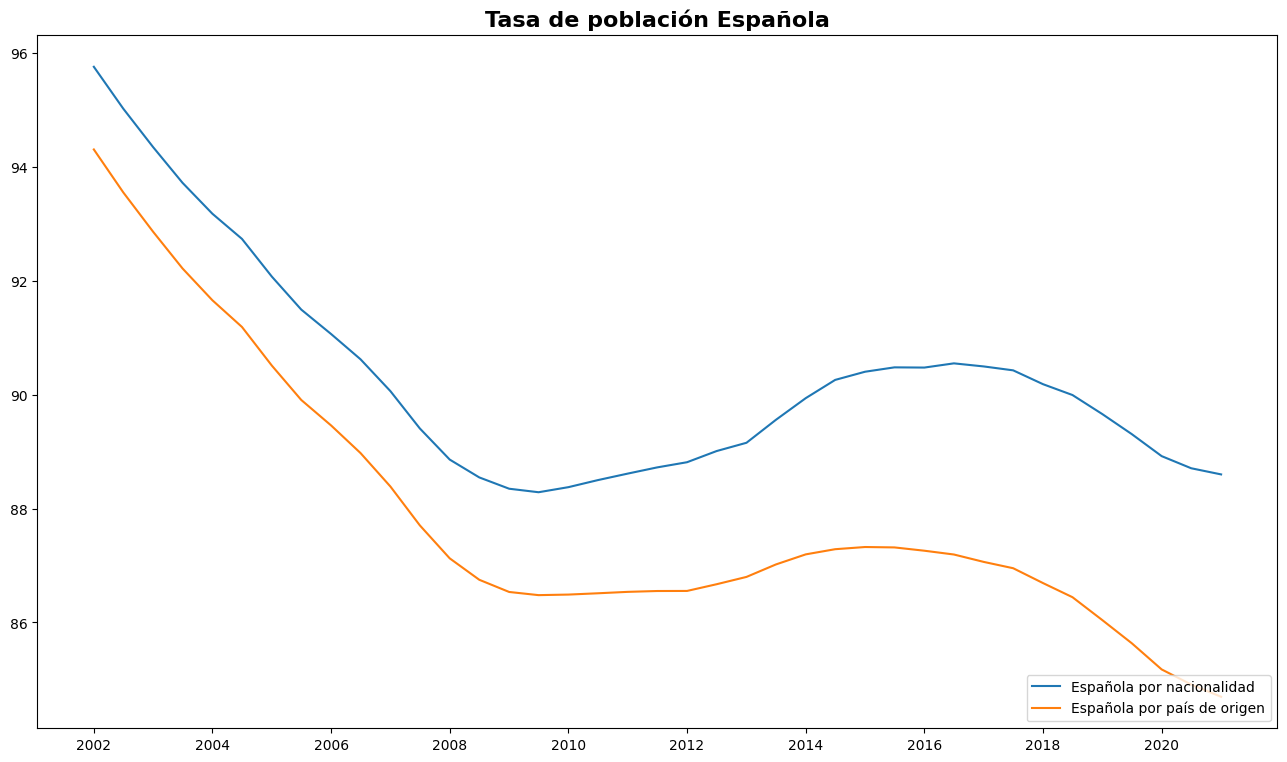

In [169]:
my_series_plot1 = 100 * (my_series_56936_total - my_series_56936_extranjeros) / my_series_56936_total
my_series_plot2 = 100 * (my_series_56937_total - my_series_56937_extranjeros) / my_series_56937_total

fig, ax = plt.subplots(figsize=(16, 9))
ax.plot(my_series_plot1, label='Española por nacionalidad')
ax.plot(my_series_plot2, label='Española por país de origen')
ax.set_title('Tasa de población Española', fontsize=16, weight='bold')
ax.set_xlabel('')
ax.set_ylabel('')
ax.legend(loc='lower right')
plt.plot()

[]

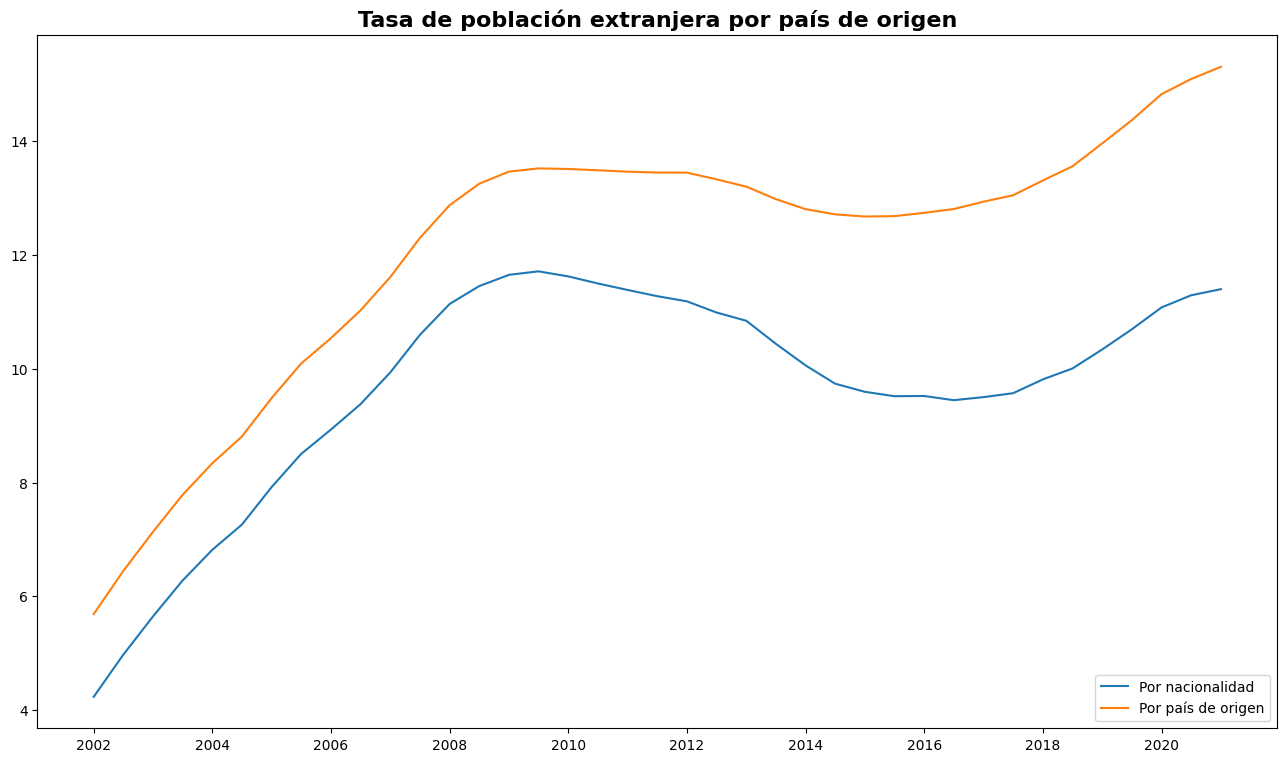

In [166]:
my_series_plot1 = 100 * (my_series_56936_extranjeros / my_series_56936_total)
my_series_plot2 = 100 * (my_series_56937_extranjeros / my_series_56937_total)

fig, ax = plt.subplots(figsize=(16, 9))
ax.plot(my_series_plot1, label='Por nacionalidad')
ax.plot(my_series_plot2, label='Por país de origen')
ax.set_title('Tasa de población extranjera por país de origen', fontsize=16, weight='bold')
ax.set_xlabel('')
ax.set_ylabel('')
ax.legend(loc='lower right')
plt.plot()

[]

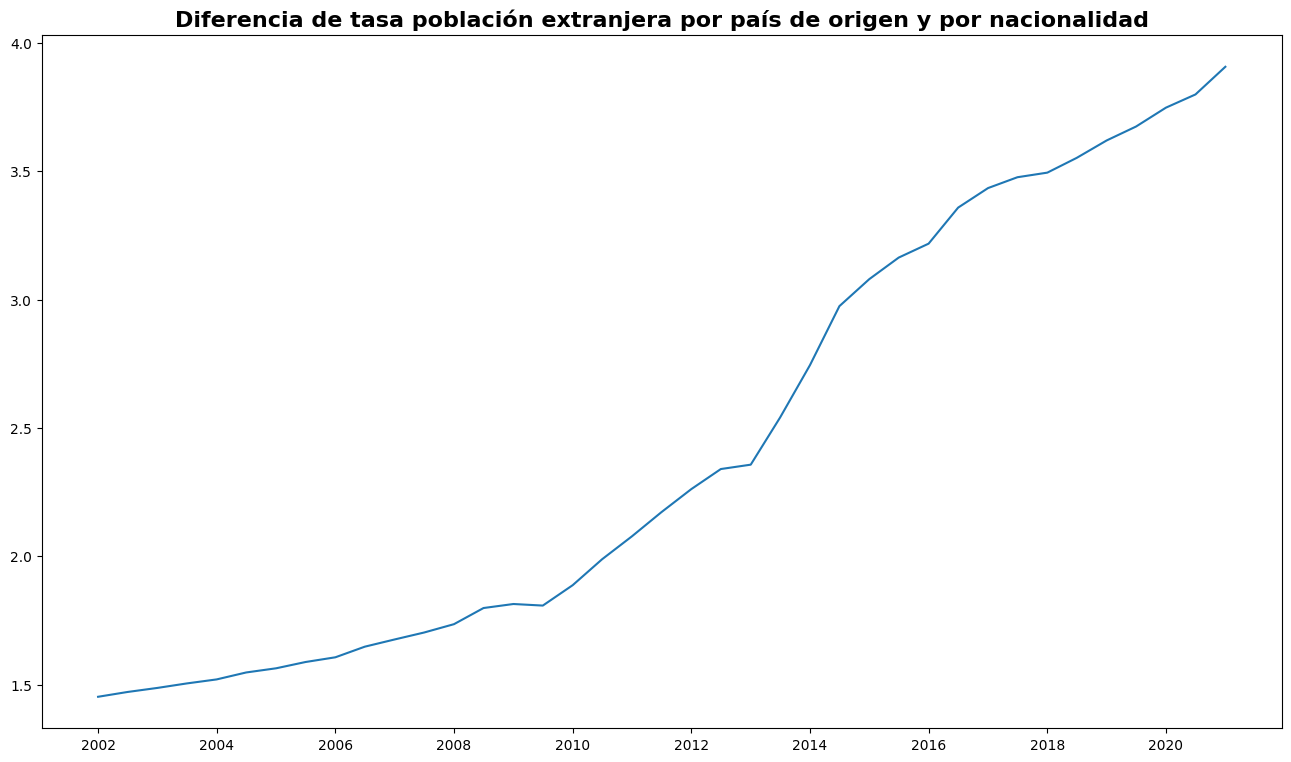

In [161]:
my_series_plot1 = 100 * (my_series_56936_extranjeros / my_series_56936_total)
my_series_plot2 = 100 * (my_series_56937_extranjeros / my_series_56937_total)

my_series_plot = my_series_plot2 - my_series_plot1

fig, ax = plt.subplots(figsize=(16, 9))
ax.plot(my_series_plot)
ax.set_title('Diferencia de tasa población extranjera por país de origen y por nacionalidad', fontsize=16, weight='bold')
ax.set_xlabel('')
ax.set_ylabel('')
plt.plot()

# EMPLEO

## EPA

In [131]:
my_table_activos = read_tabla('4049', 'nult=100&tip=A')
my_table_ocupados = read_tabla('4076', 'nult=100&tip=A')
my_table_horas = read_tabla('4335', 'nult=100&tip=A')

[]

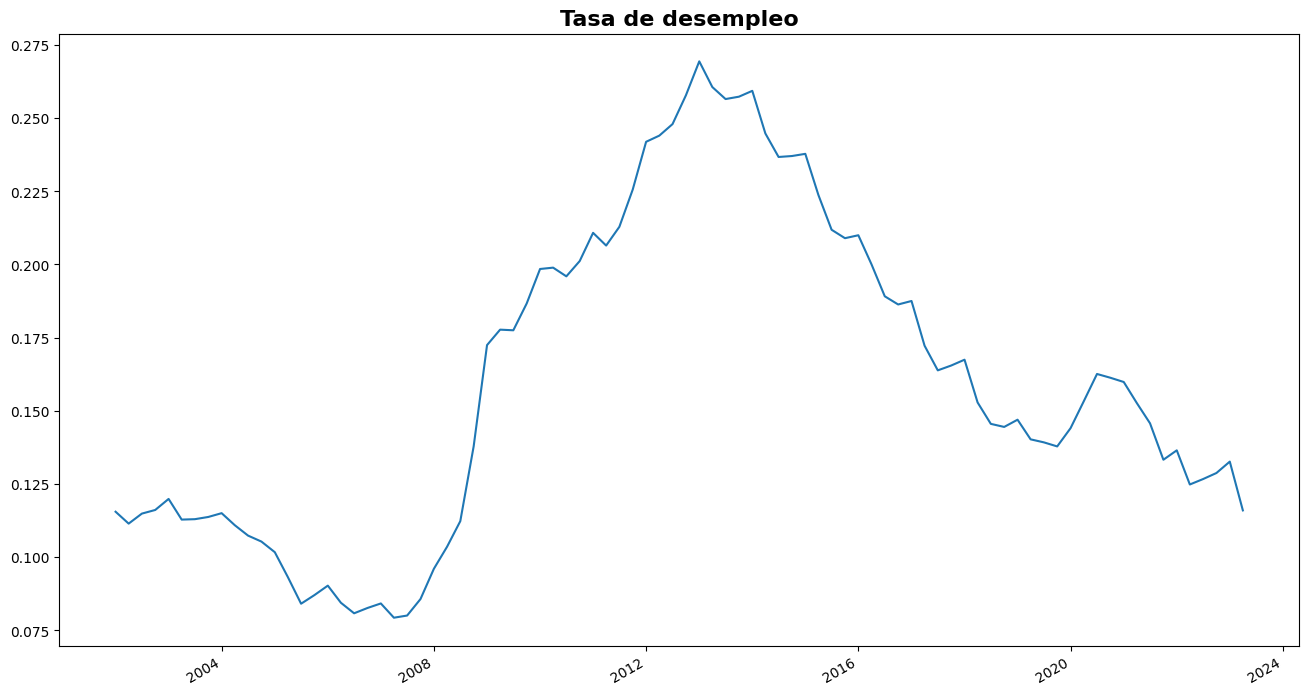

In [132]:
my_series_ocupados = my_table_ocupados['Total Nacional. Ambos sexos. 16 y más años. Ocupados. Personas. ']
my_series_activos  = my_table_activos['Total Nacional. Ambos sexos. 16 y más años. Activos. Personas. ']

my_series_plot = 1 - my_series_ocupados / my_series_activos

fig, ax = plt.subplots(figsize=(16, 9))
my_series_plot.plot(ax=ax)
ax.set_title('Tasa de desempleo', fontsize=16, weight='bold')
ax.set_xlabel('')
ax.set_ylabel('')
plt.plot()

[]

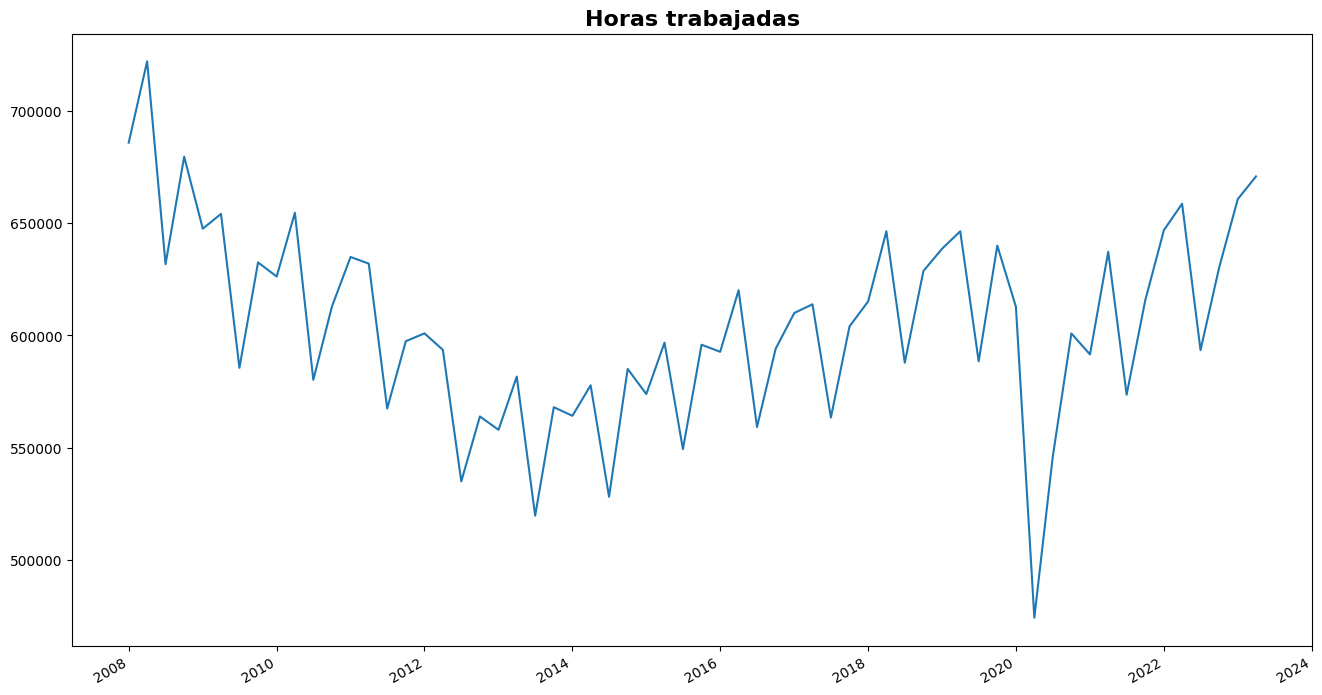

In [134]:
my_series_horas = my_table_horas['Total Nacional. Ambos sexos. Total. Total CNAE. Ocupados. Número total de horas efectivas trabajadas. ']
my_series_plot = my_series_horas.copy()
fig, ax = plt.subplots(figsize=(16, 9))
my_series_plot.plot(ax=ax)
ax.set_title('Horas trabajadas', fontsize=16, weight='bold')
ax.set_xlabel('')
ax.set_ylabel('')
plt.plot()